In [ ]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm 
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_dir ="/content/drive/MyDrive/Colab_Notebooks/CycleGAN/brain_tumor_dataset/train/"

In [ ]:
tumor_detection_yes = folder_dir + "yes/"
tumor_detection_no = folder_dir + "no/"

In [ ]:
len(os.listdir(tumor_detection_no))

98

In [ ]:
def load_data_and_labels(folder, label):
    data = []
    labels = []
    path = folder

    for file_name in tqdm(os.listdir(path)):
        img_path = os.path.join(path, file_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
        img = img / 255.0  
        data.append(img)
        labels.append(label)

    return data, labels


yes_data, yes_labels = load_data_and_labels(tumor_detection_yes, 1)
no_data, no_labels = load_data_and_labels(tumor_detection_no, 0)

100%|██████████| 98/98 [00:36<00:00,  2.70it/s]


Text(0.5, 1.0, 'no')

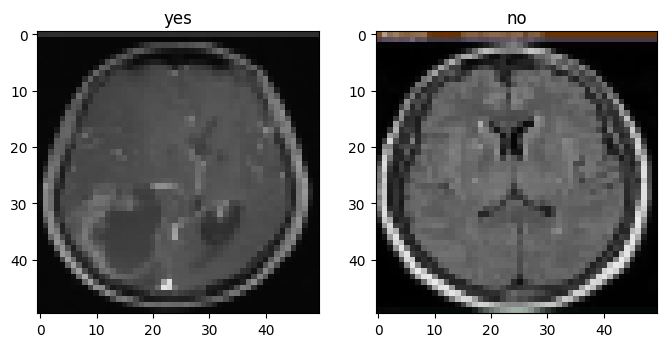

In [ ]:
g, ax = plt.subplots(1, 2, figsize = (8,4))\

ax[0].imshow(yes_data[5])
ax[0].set_title("yes")

ax[1].imshow(no_data[5])
ax[1].set_title("no")

In [ ]:
from sklearn.model_selection import train_test_split


X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(yes_data, yes_labels, test_size=0.2, random_state=42)


X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(no_data, no_labels, test_size=0.2, random_state=42)


X_train = np.array(X_train_yes + X_train_no)
X_test = np.array(X_test_yes + X_test_no)
y_train = np.array(y_train_yes + y_train_no)
y_test = np.array(y_test_yes + y_test_no)


print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Ukuran X_train: (202, 50, 50, 3)
Ukuran y_train: (202,)
Ukuran X_test: (51, 50, 50, 3)
Ukuran y_test: (51,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation="relu"))
model.add(Dense(14, activation="softmax"))

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
6/6 [==============================] - 2s 200ms/step - loss: 1.1323 - accuracy: 0.5691 - val_loss: 1.0967 - val_accuracy: 0.4762
Epoch 2/20
6/6 [==============================] - 1s 136ms/step - loss: 0.4531 - accuracy: 0.8011 - val_loss: 1.0442 - val_accuracy: 0.5238
Epoch 3/20
6/6 [==============================] - 1s 111ms/step - loss: 0.3614 - accuracy: 0.8453 - val_loss: 0.7659 - val_accuracy: 0.5238
Epoch 4/20
6/6 [==============================] - 1s 143ms/step - loss: 0.2646 - accuracy: 0.9116 - val_loss: 0.8221 - val_accuracy: 0.5238
Epoch 5/20
6/6 [==============================] - 1s 168ms/step - loss: 0.2091 - accuracy: 0.9337 - val_loss: 0.8132 - val_accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 1s 172ms/step - loss: 0.1522 - accuracy: 0.9724 - val_loss: 0.9198 - val_accuracy: 0.6667
Epoch 7/20
6/6 [==============================] - 1s 154ms/step - loss: 0.1086 - accuracy: 0.9834 - val_loss: 1.1954 - val_accuracy: 0.6190
Epoch 8/20
6/6 [====

In [ ]:
model.save("/content/drive/MyDrive/Colab_Notebooks/CycleGAN/chkpoint/tumor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [ ]:
prediction = np.argmax(y_pred, axis =1)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0])

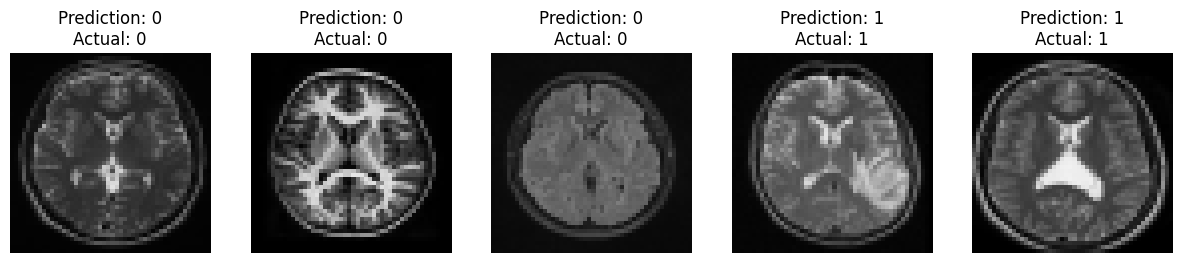

In [ ]:
import matplotlib.pyplot as plt

# Function to display MRI images with predictions
def display_images_with_predictions(images, predictions, true_labels):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"Prediction: {predictions[i]}\nActual: {true_labels[i]}")
        plt.axis("off")
    plt.show()

# Select a few images from the test set
num_display = 5
sample_indices = np.random.choice(len(X_test), num_display, replace=False)

# Display selected images with predictions
display_images_with_predictions(X_test[sample_indices], prediction[sample_indices], y_test[sample_indices])


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(prediction, y_test))
print("Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.94      0.88      0.91        33

    accuracy                           0.88        51
   macro avg       0.87      0.88      0.87        51
weighted avg       0.89      0.88      0.88        51

Accuracy:  0.8823529411764706


In [ ]:
def read_and_predict_image(image_path, model):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
    img = img / 255.0  # Normalization

    # Reshape the image to match the model's expected input shape
    img = np.reshape(img, (1, 50, 50, 3))

    # Make a prediction
    prediction = model.predict(img)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and prediction result
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {'Yes' if predicted_class == 1 else 'No'}")
    plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 38ms/step


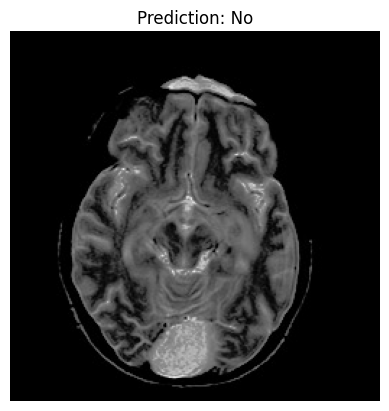

In [ ]:
#testing on ground truth MRI
ground_truth = "/content/drive/MyDrive/Colab_Notebooks/CycleGAN/gt1.jpg"
read_and_predict_image(ground_truth, model)

1/1 [==============================] - 0s 27ms/step


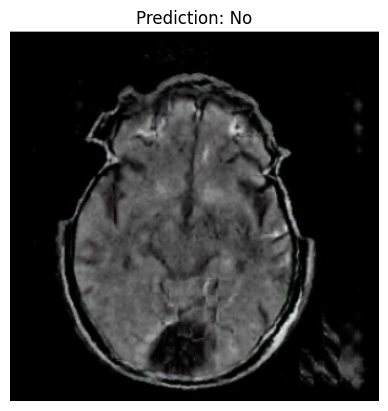

In [ ]:
#testing on generated MRI
generated = "/content/drive/MyDrive/Colab_Notebooks/CycleGAN/gene1.jpg"
read_and_predict_image(generated, model)